##Tercer Parcial

Estadística Aplicada

Nombre: Susana Yareli Lino Reséndiz

Matricula: 1986245

Grupo: 041

In [1]:
#Librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Tamaño de gráficas
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
pip install pmdarima

In [3]:
#Librerias especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [4]:
#Datos
metro = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv')
metro.head()

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995/01,3439.0,3240.0
1,1995/02,2879.0,3623.0
2,1995/03,3103.0,3990.0
3,1995/04,3491.0,3321.0
4,1995/05,3109.0,3777.0


1. Muestre de que tipo son las variables del dataframe, revise que no haya missing values (de haberlos imputar valores). Cersiorarse que exista una variable fecha, que sea el index y tenga una frecuencia asignada.

In [5]:
metro.dtypes

mes                           object
miles de pasajeros           float64
ingresos (miles de pesos)    float64
dtype: object

In [6]:
metro.isnull().sum()

mes                          0
miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

In [7]:
#Convertir mes a tiempo
metro['mes'] = pd.to_datetime(metro['mes'], format='%Y/%m')
metro = metro.set_index('mes')
metro = metro.asfreq('MS')

In [8]:
metro.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='mes', length=344, freq='MS')

2. Análisis  exploratorio.  Utilizando  código  de  Python  genera  un  print() para  cada una de la siguiente información:

>a) Rango de fechas


In [9]:
print("Rango de fechas:", metro.index.min(), "-", metro.index.max())

Rango de fechas: 1995-01-01 00:00:00 - 2023-08-01 00:00:00


>b) Número de observaciones

In [10]:
print("Número de observaciones:", len(metro))

Número de observaciones: 344


>c) Valor mínimo y valor máximo del número de pasajeros

In [11]:
print("El valor mínimo del número de pasajeros:", metro['miles de pasajeros'].min().round(0))
print("El valor máximo del número de pasajeros:", metro['miles de pasajeros'].max().round(0))

El valor mínimo del número de pasajeros: 2397.0
El valor máximo del número de pasajeros: 17535.0


3. Grafica lo siguiente:

>a) La serie de miles de pasajeros

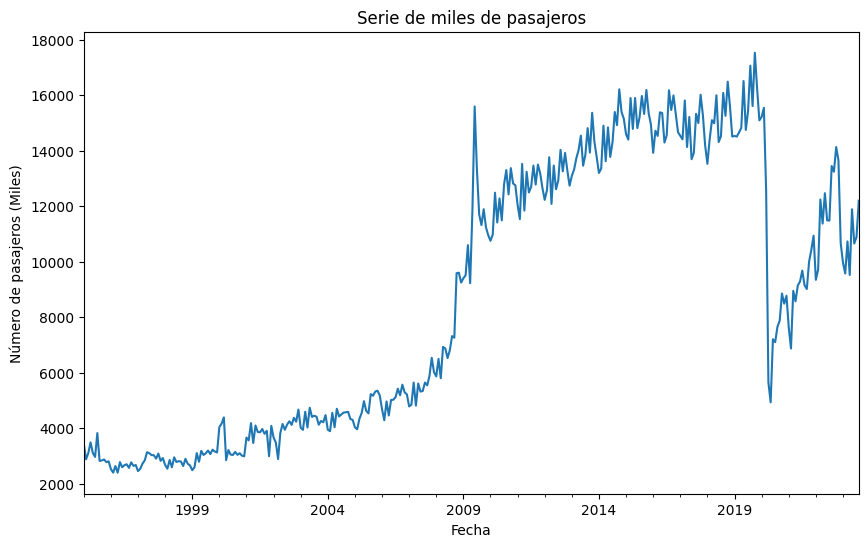

In [12]:
metro['miles de pasajeros'].plot()
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros (Miles)')
plt.title('Serie de miles de pasajeros')
plt.show()

>b) Una media móvil centrada a 7 meses, y explica si la serie tiene tendencia o no, y si existen ciclos (subidas y caídas) y que se debe cada uno.

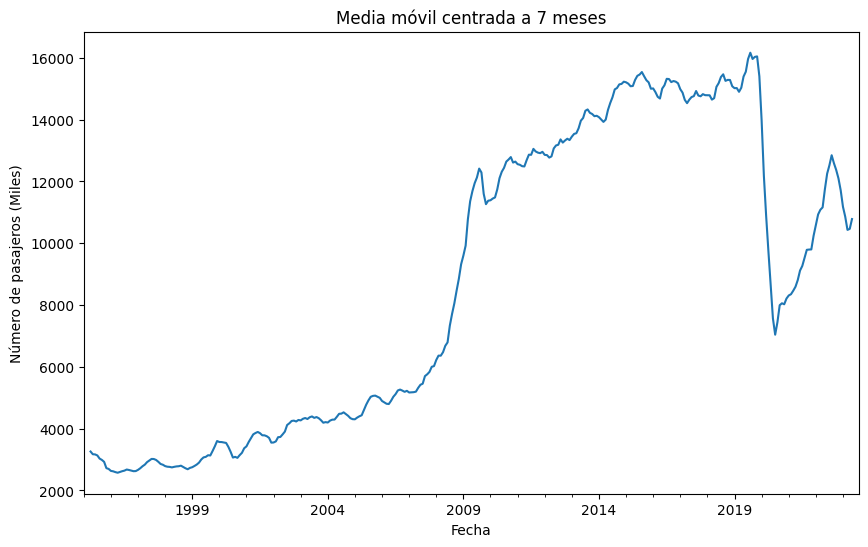

In [13]:
media_movil = metro['miles de pasajeros'].rolling(7, center = True).mean()
media_movil.plot()
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros (Miles)')
plt.title('Media móvil centrada a 7 meses')
plt.show()

>En la gráfica se puede observar que la serie aparenta tener una tendencia alcista, con una gran subida entre los años 2009 - 2010 y una gran caída en el año 2020.\
>La **subida** se debe que se abrio otra linea del metro, por lo tanto, hay más posibilidades de llegar a lugares mas lejos con solo un medio de trasporte.\
>La **caída** se debe que en el año 2020 empezo la pandemia del COVID-19 en México por lo que las personas no salian de casa, por lo que, no ocupaban este medio de transporte.

4. El director  de  Metrorrey  planea  hacer  mantenimiento  a  las  estaciones  y  los vagones,  pero  no  sabe  la  fecha  adecuada  para  hacerlo.  Utiliza  el  modelo  ETS para  obtener  el  componente  estacional  de  la  serie  y  señala  el  mes  o  meses adecuados para dar mantenimiento.

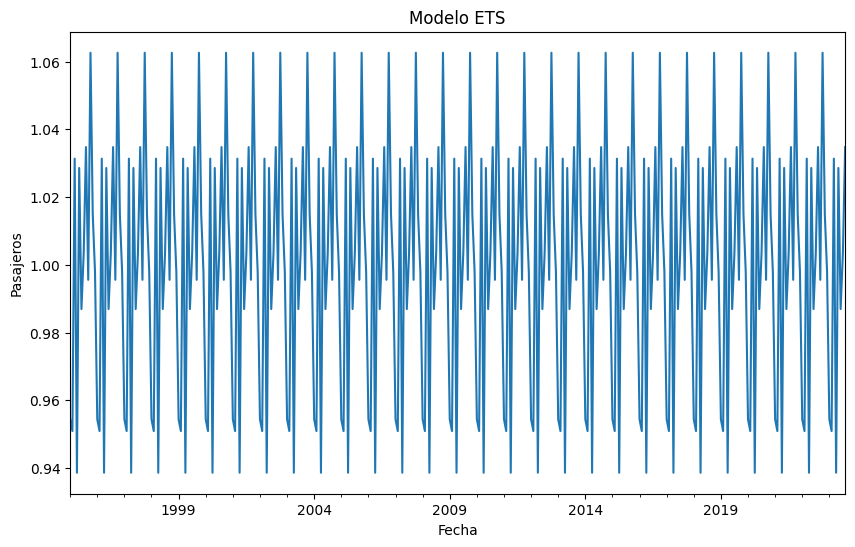

In [14]:
modelo_ETS = seasonal_decompose(metro['miles de pasajeros'], model = "mult").seasonal
modelo_ETS.plot()
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.title('Modelo ETS')
plt.show()

>Con la gráfica del modelo ETS se observa los meses donde el componente estacional es alto, esto para identificar los meses adecuados para hacer el mantenimiento, ya que en los meses donde hay picos estacionales en pasajeros son los meses en los que se espera una mayor demanda de usuarios, por ende, el mantenimiento se hace donde no hay tanta demanda, entonces, los meses donde se puede hacer el mantenimiento segun la gráfica serian los últimos meses del año y principios del año siguiente.

5. El  director  de  Metrorrey  quiere  saber  los  ingresos  por  pasaje  y  el  número  de pasajeros  los  siguientes  5  meses. Utiliza  el  método  de  Holt-Winters  para pronosticar  el  número  de  pasajeros los  próximos  5  meses,  cada  pronóstico multiplícalo por $7.1 para tener un estimado de los ingresos.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Pronóstico de Pasajeros para los próximos 5 meses:
2023-09-01    11552.43
2023-10-01    12209.85
2023-11-01    11483.30
2023-12-01    10782.87
2024-01-01    10391.56
Freq: MS, dtype: float64


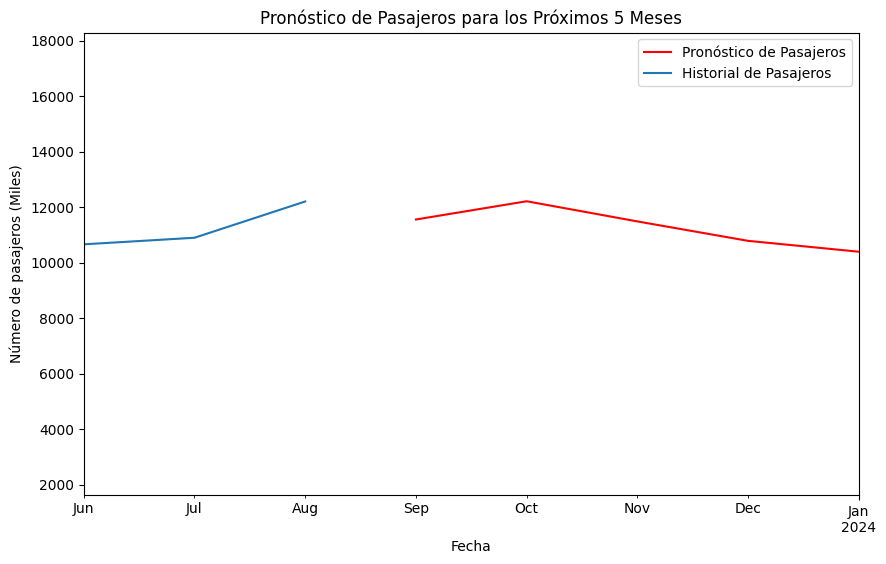

In [15]:
modelo_hw = ExponentialSmoothing(metro['miles de pasajeros'], trend='mul', seasonal='mul', seasonal_periods=12).fit()
hw = modelo_hw
pronostico = hw.forecast(steps=5)
print("Pronóstico de Pasajeros para los próximos 5 meses:")
print(pronostico.round(2))
pronostico.plot(color = 'red', label = 'Pronóstico de Pasajeros')
metro['miles de pasajeros'].plot(label = 'Historial de Pasajeros')
plt.title('Pronóstico de Pasajeros para los Próximos 5 Meses')
plt.xlim('2023-06-01', '2024-01-01')
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros (Miles)')
plt.legend()
plt.show()

In [16]:
ingresos = pronostico * 7.1
print("Ingresos Estimados para los próximos 5 meses:")
print(ingresos.round(2))

Ingresos Estimados para los próximos 5 meses:
2023-09-01    82022.24
2023-10-01    86689.95
2023-11-01    81531.45
2023-12-01    76558.38
2024-01-01    73780.10
Freq: MS, dtype: float64


6. Realiza un pronóstico de los miles de pasajeros con el modelo ARIMA cumpliendo los siguientes pasos:

>a) Realiza una prueba de raíz unitaria a la serie original.

In [17]:
adf = adfuller(metro['miles de pasajeros'])
print('P_valor = ', adf[1].round(2))

if adf[1] < 0.05:
    print('Se rechaza, por lo tanto la serie es estacionaria')
else:
    print('No se rechaza, por lo tanto la serie no es estacionaria')

P_valor =  0.58
No se rechaza, por lo tanto la serie no es estacionaria


>b) En caso de que no sea estacionaria aplica primeras diferencias, y realiza la prueba de raíz unitaria para verificar que la serie sea estacionaria.

In [18]:
metro['primeras_diff'] = metro['miles de pasajeros'].diff()
adf2 = adfuller(metro['primeras_diff'].dropna())
print('P_valor = ', adf2[1].round(2))
if adf2[1] <= 0.05:
    print('Se rechaza, por lo tanto la serie es estacionaria')
else:
    print('No se rechaza, por lo tanto la serie no es estacionaria')

P_valor =  0.0
Se rechaza, por lo tanto la serie es estacionaria


>c) Si la serie no es estacionaria repite el paso b hasta que la serie sea estacionaria.

>Como la serie ya es estacionaria no es necesario seguir repitiendo.

>d) Realiza las graficas de autocorrelación de la serie  estacionaria para verificar si la serie tiene o no un componente estacional.

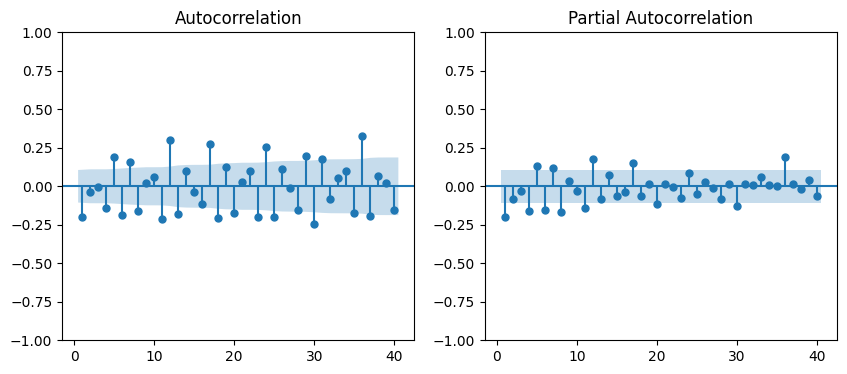

In [19]:
ig, ax = plt.subplots(1, 2, figsize = (10,4))
plot_acf(metro['primeras_diff'].dropna(), zero = False, lags = 40, ax = ax[0])
plot_pacf(metro['primeras_diff'].dropna(), zero = False, lags = 40, ax = ax[1])
plt.show()

>Esto nos confirma que es una serie estacional.

>e) Utiliza auto_arimapara encontrar el orden del modelo arima, dando el parámetro information_criterionprueba y muestra el resultado, con aic, bic, hqic, oob, en caso de que resulten diferente elegir aic si tu matricula termina en par, sino termina en par elegir uno distinto a aic.

In [20]:
aic = pm.auto_arima(metro['miles de pasajeros'],
                    start_p = 1, start_q = 1,
                    max_p = 7, max_q = 7,
                    m = 12, information_criterion = 'aic',
                    seasonal = True,
                    start_P = 1, start_Q = 1,
                    max_P = 7, max_Q = 7)
aic.params

<bound method ARIMA.params of ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

In [21]:
bic = pm.auto_arima(metro['miles de pasajeros'],
                    start_p = 1, start_q = 1,
                    max_p = 7, max_q = 7,
                    m = 12, information_criterion = 'bic',
                    seasonal = True,
                    start_P = 1, start_Q = 1,
                    max_P = 7, max_Q = 7)
bic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

In [22]:
hqic = pm.auto_arima(metro['miles de pasajeros'],
                    start_p = 1, start_q = 1,
                    max_p = 7, max_q = 7,
                    m = 12, information_criterion = 'hqic',
                    seasonal = True,
                    start_P = 1, start_Q = 1,
                    max_P = 7, max_Q = 7)
hqic.params

<bound method ARIMA.params of ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

In [23]:
oob = pm.auto_arima(metro['miles de pasajeros'],
                    start_p = 1, start_q = 1,
                    max_p = 7, max_q = 7,
                    m = 12, information_criterion = 'oob',
                    seasonal = True,
                    start_P = 1, start_Q = 1,
                    max_P = 7, max_Q = 7)
oob.params

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


<bound method ARIMA.params of ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

Mi matricula es **1986245** por lo que termina en número impar, por lo que elijo HQIC, donde, SARIMA (2, 1, 0)(1, 0, 1, 12)

>f) Con  el  orden  del  modelo  arima  obtenido  estima  el  modelo  arima.

In [24]:
model = ARIMA(metro['miles de pasajeros'],
              order = (2, 1, 0),
              seasonal_order=(1, 0, 1, 12))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                 miles de pasajeros   No. Observations:                  344
Model:             ARIMA(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -2775.293
Date:                            Sat, 04 Nov 2023   AIC                           5560.585
Time:                                    22:03:05   BIC                           5579.774
Sample:                                01-01-1995   HQIC                          5568.229
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0412      0.031     -1.343      0.179      -0.101       0.019
ar.L2         -0.1681      0.035   

>g) Realiza la gráfica del pronóstico a 5 meses con los intervalos de confianza y la serie original desde 2021.

In [25]:
metro.tail()

,miles de pasajeros,ingresos (miles de pesos),primeras_diff
mes,,,
2023-04-01,9523.669,38799.657,-1210.233
2023-05-01,11891.646,58511.798,2367.977
2023-06-01,10657.712,55684.063,-1233.934
2023-07-01,10894.497,56378.304,236.785
2023-08-01,12201.982,57821.901,1307.485


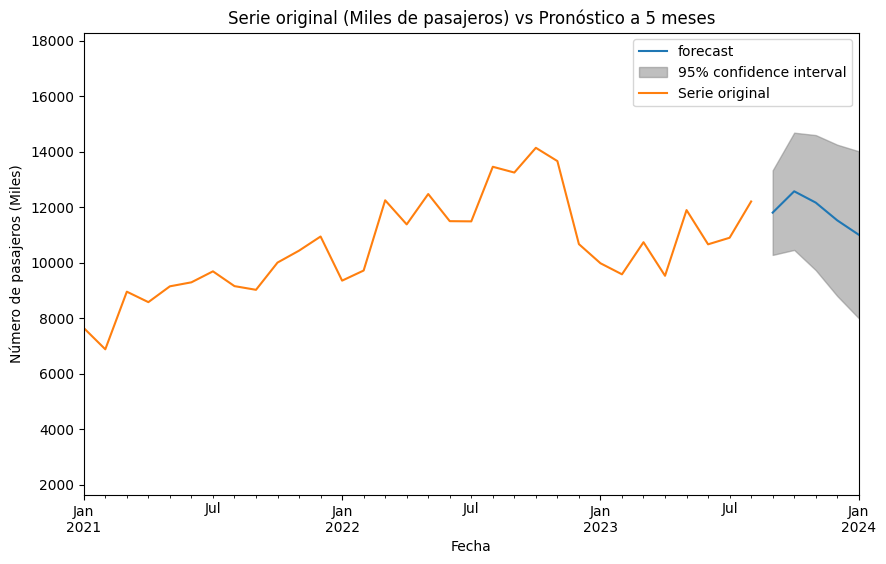

In [26]:
plot_predict(results,'2023-09-01', '2024-01-01')
metro['miles de pasajeros'].plot(label = 'Serie original')
plt.title('Serie original (Miles de pasajeros) vs Pronóstico a 5 meses')
plt.xlim('2021-01-01', '2024-01-01')
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros (Miles)')
plt.legend()
plt.show()

In [27]:
results.predict('2023-09-01', '2024-01-01').round(0)

2023-09-01    11800.0
2023-10-01    12569.0
2023-11-01    12161.0
2023-12-01    11522.0
2024-01-01    11003.0
Freq: MS, Name: predicted_mean, dtype: float64

>h) Realiza  el  pronóstico  a  5  meses  con  los  intervalos  de confianza.

In [28]:
forecast = results.get_forecast(steps = 5)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [29]:
inicio ='2023-09-1'
fin = '2024-01-01'

In [30]:
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]
pronostico_valor.round(0)

2023-09-01    11800.0
2023-10-01    12569.0
2023-11-01    12161.0
2023-12-01    11522.0
2024-01-01    11003.0
Freq: MS, Name: predicted_mean, dtype: float64

In [31]:
df_pronostico = pd.DataFrame({
    'pronostico': pronostico_valor,
    'limite inferior': pronostico_intervalos.iloc[:,0],
    'limite superior': pronostico_intervalos.iloc[:,1]
})

In [32]:
print(f'Los pasajeros que se prónostica que usaran el metro como medio de transporte en septiembre del 2023 son {df_pronostico.iloc[0,0].round(0)}, \n pero puede estar entre {df_pronostico.iloc[0,1].round(0)} y {df_pronostico.iloc[0,2].round(0)}')

Los pasajeros que se prónostica que usaran el metro como medio de transporte en septiembre del 2023 son 11800.0, 
 pero puede estar entre 10276.0 y 13325.0


>i) Calcula los ingresos y el intervalo de los ingreso multiplicando por $7.1

In [33]:
ingresos = pronostico_valor * 7.1
print("Ingresos Estimados para los próximos 5 meses:")
print(ingresos.round(2))

Ingresos Estimados para los próximos 5 meses:
2023-09-01    83782.46
2023-10-01    89236.66
2023-11-01    86345.07
2023-12-01    81802.92
2024-01-01    78118.00
Freq: MS, Name: predicted_mean, dtype: float64
